In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 예시: 맑은 고딕으로 설정 (Windows 환경 시)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv("선택컬럼_건강데이터(2022~2023년)_변수추가.csv")
df.columns

Index(['ID', 'year', 'region', 'town_t', 'sex', 'age', 'incm', 'ho_incm',
       'edu', 'occp',
       ...
       'L_DN_FQ', 'L_OUT_FQ', 'LS_VEG1', 'LS_FRUIT', 'BE3_72', 'BE3_73',
       'BE3_74', 'BE3_82', 'BE3_83', 'BE3_84'],
      dtype='object', length=104)

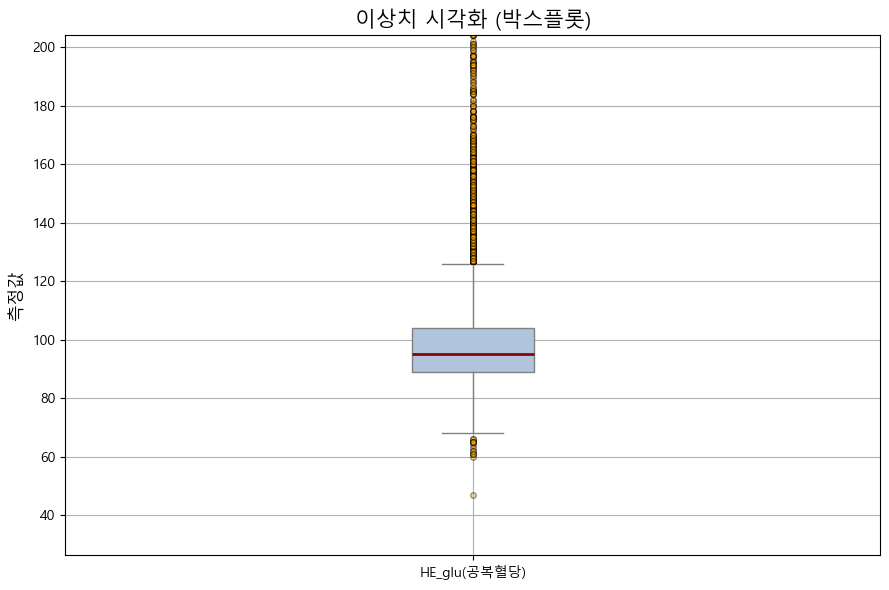

In [42]:
import matplotlib.pyplot as plt
# 한글 폰트 설정 (Windows 사용자 기준, 필요시 주석 해제)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지
# 시각화용 데이터 준비
columns_to_plot = ['HE_glu']
column_labels = {
    'HE_glu': 'HE_glu(공복혈당)'
}
data_boxplot = df[columns_to_plot].copy()
data_boxplot.columns = [column_labels[col] for col in columns_to_plot]
# 박스플롯
plt.figure(figsize=(9, 6))
box = data_boxplot.boxplot(
    grid=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightsteelblue', color='gray'),
    medianprops=dict(color='darkred', linewidth=2),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=4, alpha=0.4),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray')
)
# 제목 및 라벨
plt.title('이상치 시각화 (박스플롯)', fontsize=15)
plt.ylabel('측정값', fontsize=12)
# Y축 상한 설정 (너무 높은 이상치가 시야 가리는 경우)
plt.ylim(top=data_boxplot.quantile(0.95).max() * 1.5)
plt.tight_layout()
plt.show()

In [44]:
df.describe()

,year,region,town_t,sex,age,incm,ho_incm,edu,occp,cfam,genertn,D_1_1,DI1_dg,DI1_ag,DI1_pr,DI1_pt,DI1_2,DI2_dg,DI2_ag,DI2_pr,DI2_pt,DI2_2,DE1_dg,DE1_ag,DE1_pr,DE1_pt,DE1_3,DE1_31,DE1_32,DE1_33,DE1_34,DE1_4,DN1_dg,DN1_ag,BH1,BO1,BO1_1,BO2_1,BD1,BD1_11,BD2_1,BP16_1,BP16_2,BP1,BP5,BS1_1,BS3_1,BS3_2,BS12_37,BS12_47,BS12_47_1,BS12_1,BS12_2,BE3_31,BE3_32,BE3_33,BE5_1,BE9,HE_fh,HE_HPfh1,HE_HPfh2,HE_HLfh1,HE_HLfh2,HE_DMfh1,HE_DMfh2,HE_sbp1,HE_dbp1,HE_sbp2,HE_dbp2,HE_HP,HE_ht,HE_wt,HE_wc,HE_BMI,HE_obe,HE_glu,HE_HbA1c,HE_DM_HbA1c,HE_chol,HE_HDL_st2,HE_TG,HE_LDL_drct,HE_HCHOL,HE_HTG,HE_ast,HE_alt,HE_BUN,HE_crea,HE_Upro,HE_Ucrea,HE_Ualb,L_BR_FQ,L_LN_FQ,L_DN_FQ,L_OUT_FQ,LS_VEG1,LS_FRUIT,BE3_72,BE3_73,BE3_74,BE3_82,BE3_83,BE3_84
count,13194.000000,13194.000000,13194.000000,13194.000000,13194.000000,13157.000000,13157.000000,12812.000000,10624.000000,13194.000000,13194.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.00000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,11221.000000,11729.00000,11729.000000,11729.000000,11729.000000,11729.000000,11729.000000,12490.000000,12490.000000,12490.000000,12490.000000,11009.000000,12964.000000,13104.000000,12285.000000,12959.000000,10977.000000,11744.000000,11710.000000,10511.000000,11744.000000,11744.000000,11744.000000,11744.000000,10567.000000,9677.000000,11743.000000,11719.000000,11744.000000,11744.000000,11828.000000,11828.000000,9100.000000,12629.000000,12629.000000,12629.000000,12629.000000,12629.000000,12629.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000,13185.000000
mean,2022.525163,7.785509,1.203123,1.553964,47.122177,2.499962,2.680626,2.698252,4.724115,2.782250,3.386918,3.153432,1.432461,687.465074,6.287675,6.283656,6.365946,1.412438,703.785362,6.413955,6.403489,6.590595,1.293364,802.021843,7.269473,7.266818,7.276754,7.216231,7.305726,7.217975,7.208267,7.346985,1.844520,879.195146,2.819492,3.57482,2.666060,2.617217,2.522715,4.326735,4.760865,16.965870,17.670686,3.468032,5.003034,3.495108,6.141904,776.664088,2.932120,7.610087,862.721653,2.943041,7.641638,24.277740,31.548881,43.103678,3.016610,83.290633,0.789056,0.81064,0.695370,0.787706,0.660500,0.683093,0.549919,120.531305,73.915132,118.635228,72.968615,2.398401,159.769091,60.824657,81.966854,23.296455,2.972943,100.483566,5.599795,1.625059,184.564118,57.135473,123.888709,111.774183,0.306899,0.114395,22.671804,21.562505,14.253491,0.788002,0.192002,128.888673,22.986714,1.827144,1.161771,1.119883,4.157970,1.744635,4.507404,7.998938,87.400683,87.602351,7.686234,80.841638,81.830944
std,0.499385,5.008179,0.402338,0.497098,22.177893,1.118178,1.076787,1.202002,2.329458,1.203957,1.607743,1.832831,2.776135,356.514628,3.022918,3.030603,2.923158,2.782781,345.549820,2.963377,2.984174,2.720467,2.819043,253.545249,2.144428,2.152790,2.123699,2.366690,2.095465,2.361734,2.389171,1.927689,3.442811,121.912866,2.961043,1.40524,2.516551,1.794871,1.987626,2.550736,2.948499,27.584819,27.338313,1.783588,3.073630,2.102391,2.758173,294.616132,2.308113,1.505009,152.644309,2.301300,1.502722,36.109244,42.727655,36.680002,2.864578,19.529031,1.206773,2.24369,1.979873,2.486687,2.241668,2.191448,1.926139,17.085942,10.542230,16.551954,10.240653,1.340767,15.949337,16.858421,12.313630,4.202148,1.071470,22.492904,0.769622,0.733808,40.124506,15.271038,93.952699,36.247556,0.461229,0.318307,15.129282,21.365243,4.554367,0.238124,0.505567,78.220369,115.503342,1.171596,0.548164,0.425704,1.709683,1.898465,2.419901,0.671113,11.362484,9.995486,1.384043,25.45

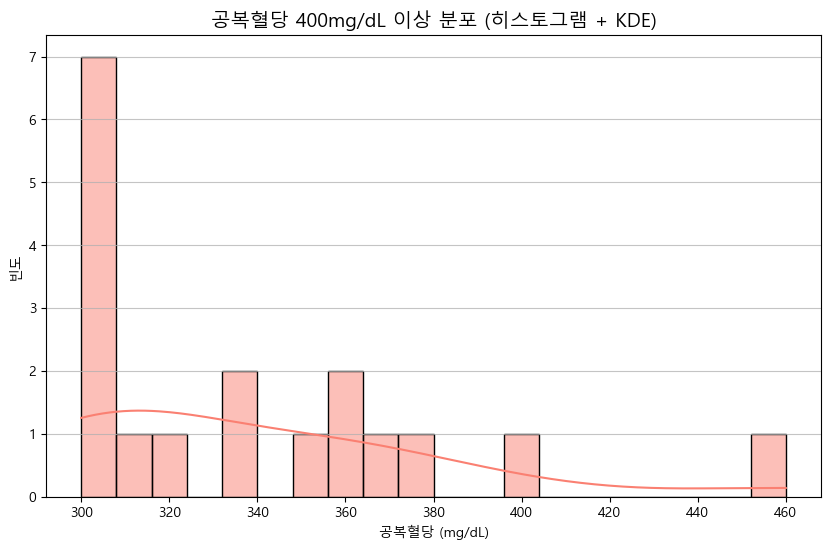

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # pandas 라이브러리 import

# 예시 데이터프레임 생성 (실제 데이터프레임 구조에 맞게 수정 필요)
# data_high_glu가 어떤 데이터인지 명확하지 않아 예시로 생성합니다.
# 실제 사용 시에는 이 부분을 실제 data_high_glu 데이터로 대체해야 합니다.


plt.figure(figsize=(10, 6))
sns.histplot(
    data=data_high_glu,  # 'df' 대신 'data' 사용
    x='HE_glu',
    bins=20,
    kde=True,  # KDE 곡선도 함께 그림
    color='salmon',
    edgecolor='black'
)
plt.title("공복혈당 400mg/dL 이상 분포 (히스토그램 + KDE)", fontsize=14)
plt.xlabel("공복혈당 (mg/dL)")
plt.ylabel("빈도") # y축 레이블 추가
plt.grid(axis='y', alpha=0.75) # 그리드 추가
plt.show()

In [5]:
# 공복혈당: 50 이상 & 350 이하
df = df[(df['HE_glu'] >= 50) & (df['HE_glu'] <= 400)]
set(df["HE_glu"])

{60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 152.0,
 153.0,
 154.0,
 155.0,
 156.0,
 157.0,
 158.0,
 159.0,
 160.0,
 161.0,
 162.0,
 163.0,
 164.0,
 165.0,
 166.0,
 167.0,
 168.0,
 169.0,
 170.0,
 171.0,
 172.0,
 173.0,
 174.0,
 175.0,
 176.0,
 177.0,
 178.0,
 180.0,
 181.0,
 182.0,
 184.0,
 185.0,
 186.0,
 187.0,
 188.0,
 189.0,
 190.0,
 191.0,
 192.0,

In [40]:
df

,ID,year,region,town_t,sex,age,incm,ho_incm,edu,occp,cfam,genertn,D_1_1,DI1_dg,DI1_ag,DI1_pr,DI1_pt,DI1_2,DI2_dg,DI2_ag,DI2_pr,DI2_pt,DI2_2,DE1_dg,DE1_ag,DE1_pr,DE1_pt,DE1_3,DE1_31,DE1_32,DE1_33,DE1_34,DE1_4,DN1_dg,DN1_ag,BH1,BO1,BO1_1,BO2_1,BD1,BD1_11,BD2_1,BP16_1,BP16_2,BP1,BP5,BS1_1,BS3_1,BS3_2,BS12_37,BS12_47,BS12_47_1,BS12_1,BS12_2,BE3_31,BE3_32,BE3_33,BE5_1,BE9,HE_fh,HE_HPfh1,HE_HPfh2,HE_HLfh1,HE_HLfh2,HE_DMfh1,HE_DMfh2,HE_sbp1,HE_dbp1,HE_sbp2,HE_dbp2,HE_HP,HE_ht,HE_wt,HE_wc,HE_BMI,HE_obe,HE_glu,HE_HbA1c,HE_DM_HbA1c,HE_chol,HE_HDL_st2,HE_TG,HE_LDL_drct,HE_HCHOL,HE_HTG,HE_ast,HE_alt,HE_BUN,HE_crea,HE_Upro,HE_Ucrea,HE_Ualb,L_BR_FQ,L_LN_FQ,L_DN_FQ,L_OUT_FQ,LS_VEG1,LS_FRUIT,BE3_72,BE3_73,BE3_74,BE3_82,BE3_83,BE3_84,tobacco,Daily_High_Intensity_Activity_Min,Weekly_Total_High_Intensity_Activity_Min,Daily_m_Intensity_Activity_Min,Weekly_Total_m_Intensity_Activity_Min,HE_HP2,HE_DM_HbA1c2,HE_obe2,plus
0,b'YA01220302',2022.0,1.0,1.0,2.0,56.0,3.0,4.0,3.0,7.0,4.0,4.0,3.0,1.0,48.0,1.0,1.0,1.0,0.0,888.0,8.0,8.0,8.0,0.0,888.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,888.0,1.0,4.0,1.0,1.0,2.0,0.0,8.0,8.0,10.0,2.0,8.0,3.0,8.0,0.0,2.0,8.0,0.0,2.0,8.0,4.0,1.0,30.0,0.0,88.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,135.0,90.0,138.0,89.0,4.0,151.2,60.6,84.3,26.507517,4.0,94.0,5.6,1.0,199.0,56.0,181.0,122.0,0.0,0.0,22.0,16.0,13.0,0.61,0.0,84.6,9.7,1.5,6.0,6.0,78.0,730.0,730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,4,0.0
1,b'YA01220303',2022.0,1.0,1.0,1.0,30.0,3.0,4.0,4.0,3.0,4.0,4.0,2.0,0.0,888.0,8.0,8.0,8.0,0.0,888.0,8.0,8.0,8.0,0.0,888.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,888.0,1.0,4.0,3.0,1.0,2.0,12.0,2.0,7.0,7.0,3.0,8.0,3.0,8.0,0.0,2.0,8.0,0.0,2.0,8.0,7.0,3.0,0.0,3.0,88.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,145.0,77.0,128.0,78.0,3.0,174.1,82.3,86.2,27.152029,4.0,84.0,5.3,1.0,122.0,48.0,63.0,63.0,0.0,0.0,28.0,18.0,14.0,0.86,0.0,54.3,NaN,6.0,6.0,6.0,182.0,730.0,365.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,4,0.0
2,b'YA01220304',2022.0,1.0,1.0,2.0,25.0,3.0,4.0,4.0,7.0,4.0,4.0,2.0,0.0,888.0,8.0,8.0,8.0,0.0,888.0,8.0,8.0,8.0,0.0,888.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,888.0,2.0,4.0,2.0,1.0,2.0,42.0,1.0,6.0,8.0,2.0,8.0,3.0,8.0,0.0,2.0,8.0,0.0,2.0,8.0,7.0,0.0,20.0,3.0,88.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,103.0,64.0,104.0,63.0,1.0,166.4,59.0,69.4,21.308131,2.0,87.0,5.0,1.0,202.0,75.0,53.0,124.0,0.0,NaN,17.0,15.0,8.0,0.60,0.0,192.4,9.4,0.0,6.0,3.5,286.0,730.0,730.0,0.0,0.0,0.0,5.0,0.0,40.0,0.0,0.0,0.0,40.0,200.0,1.0,1,2,200.0
3,b'YA01236501',2022.0,1.0,1.0,1.0,66.0,3.0,3.0,4.0,7.0,2.0,2.0,2.0,0.0,888.0,8.0,8.0,8.0,1.0,56.0,1.0,1.0,1.0,0.0,888.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,888.0,1.0,3.0,1.0,2.0,2.0,12.0,2.0,9.0,9.0,4.0,8.0,2.0,3.0,0.0,2.0,8.0,0.0,2.0,8.0,7.0,1.0,30.0,0.0,88.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,116.0,80.0,120.0,78.0,2.0,168.7,67.1,83.5,23.577207,3.0,87.0,5.2,1.0,136.0,47.0,123.0,74.0,1.0,0.0,20.0,15.0,18.0,0.90,0.0,99.1,NaN,6.0,6.0,6.0,182.0,1095.0,730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,3,0.0
4,b'YA01236502',2022.0,1.0,1.0,2.0,62.0,3.0,3.0,3.0,6.0,2.0,2.0,2.0,0.0,888.0,8.0,8.0,8.0,1.0,53.0,1.0,1.0,1.0,0.0,888.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,888.0,1.0,3.0,1.0,1.0,2.0,286.0,1.0,7.0,9.0,3.0,8.0,3.0,8.0,0.0,2.0,8.0,0.0,2.0,8.0,7.0,1.0,0.0,1.0,88.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,145.0,89.0,131.0,87.0,3.0,157.1,53.9,77.5,21.839183,2.0,91.0,5.6,1.0,149.0,53.0,110.0,82.0,1.0,0.0,26.0,23.0,10.0,0.67,0.0,46.5,3.3,6.0,6.0,6.0,24.0,1095.0,730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13189,b'YR62368101',2023.0,8.0,2.0,1.0,80.0,2.0,1.0,1.0,7.0,2.0,2.0,5.0,1.0,70.0,1.0,

In [6]:
import pandas as pd #고혈압 파생변수 

def classify_bp(row):
    sbp = row['HE_sbp1']
    dbp = row['HE_dbp1']

    if sbp >= 140 or dbp >= 90:
        return '4'
    elif 130 <= sbp <= 139 or 80 <= dbp <= 89:
        return '3'
    elif 120 <= sbp <= 129 and dbp < 80:
        return '2'
    elif 0<=sbp<120 and dbp < 80:
        return '1'

# 데이터프레임에 새로운 열 추가
df['HE_HP2'] = df.apply(classify_bp, axis=1)
df['HE_HP2'] = pd.to_numeric(df['HE_HP2'], errors='coerce')


import pandas as pd #당뇨 파생변수 

def classify_bp(row):
    glu = row['HE_glu']

    if glu <= 99:
        return '1'
    elif 100 <= glu <= 125:
        return '2'
    else:
        return '3'
    

# 데이터프레임에 새로운 열 추가
df['HE_DM_HbA1c2'] = df.apply(classify_bp, axis=1)
df['HE_DM_HbA1c2'] = pd.to_numeric(df['HE_DM_HbA1c2'], errors='coerce')


import pandas as pd #비만 파생변수 

def classify_bp(row):
    bmi = row['HE_BMI']

    if bmi <= 18.5:
        return '1'
    elif 18.5 < bmi <= 22.9:
        return '2'
    elif 22.9 < bmi <= 24.9:
        return '3'
    elif 24.9 < bmi <= 29.9:
        return '4'
    elif 29.9 < bmi <= 34.9:
        return '5'
    else:
        return '6'
    

# 데이터프레임에 새로운 열 추가
df['HE_obe2'] = df.apply(classify_bp, axis=1)
df['HE_obe2'] = pd.to_numeric(df['HE_obe2'], errors='coerce')

운동, 채소, 담배, 음주 

In [7]:
df['BE5_1'] = df['BE5_1'].astype(str).str.strip().replace({ #1주일 간 근력운동 일수
'1.0' : 0,
'2.0' : 1,
'3.0' : 2,
'4.0' : 3,
'5.0' : 4,
'6.0' : 5,
'8.0' : 0,
'9.0' : np.nan,
'nan' : np.nan
 })
df['BE5_1'] = pd.to_numeric(df['BE5_1'], errors='coerce')

df['LS_VEG1'] = df['LS_VEG1'].astype(str).str.strip().replace({  #최근 1년 동안 평균 채소류(김치 및 장아찌 제외), 버섯류, 해조류 섭취 빈도
'1.0' : 1095,
'2.0' : 730,
'3.0' : 365,
'4.0' : 286,
'5.0' : 156,
'6.0' : 52,
'7.0' : 30,
'8.0' : 12,
'9.0' : 6,
'99.0': np.nan,
'nan' : np.nan
})
df['LS_VEG1'] = pd.to_numeric(df['LS_VEG1'], errors='coerce')

# 일반 담배 하루 평균 흡연량 처리
df['BS3_2'] = df['BS3_2'].replace(888, 0)

# 전자 담배 하루 평균 흡연량 처리
df['BS12_47_1'] = df['BS12_47_1'].replace({888: 0, 999: np.nan}) 

# 합치기 전 숫자형으로 변환
df['BS3_2'] = pd.to_numeric(df['BS3_2'], errors='coerce')
df['BS12_47_1'] = pd.to_numeric(df['BS12_47_1'], errors='coerce')

# 두 변수 합산 (NaN은 무시하고 합함)
df['tobacco'] = df[['BS3_2', 'BS12_47_1']].sum(axis=1, skipna=True)

df['tobacco'] = df['tobacco'].astype(str).str.strip().replace({  
'999.0': np.nan,
})

df['tobacco'] = pd.to_numeric(df['tobacco'], errors='coerce')

df['BD1_11'] = df['BD1_11'].astype(str).str.strip().replace({ #1년간 음주빈도
'1.0' : 0,
'2.0' : 6,
'3.0' : 12,
'4.0' : 42,
'5.0' : 130,
'6.0' : 286,
'8.0' : 0,
'9.0' : np.nan,
'nan' : np.nan
})
df['BD1_11'] = pd.to_numeric(df['BD1_11'], errors='coerce')

고강도 운동 

In [8]:
import pandas as pd
import numpy as np # np.nan을 사용하기 위함

# df가 이미 로드되어 있다고 가정합니다.
# df = pd.read_csv('your_data.csv') # 예시 데이터 불러오기 예시

# --- 1. 특수값 처리: '8', '88'은 0으로, '9', '99'는 NaN으로 변환 ---
# 먼저 모든 관련 컬럼을 숫자로 변환합니다. 변환 불가능한 값은 NaN 처리.
df['BE3_72'] = pd.to_numeric(df['BE3_72'], errors='coerce')
df['BE3_73'] = pd.to_numeric(df['BE3_73'], errors='coerce')
df['BE3_74'] = pd.to_numeric(df['BE3_74'], errors='coerce')

# '8' (비해당) 값은 0으로 대체
df['BE3_72'] = df['BE3_72'].replace(8, 0)
# '88' (비해당) 값은 0으로 대체
df['BE3_73'] = df['BE3_73'].replace(88, 0)
df['BE3_74'] = df['BE3_74'].replace(88, 0)

# '9' 또는 '99' (모름, 무응답) 값은 NaN으로 유지 (정보 없음으로 간주)
# 이 부분은 이전 코드에서 이미 pd.to_numeric(errors='coerce')로 인해 NaN이 되거나,
# 만약 숫자로 남아있다면 명시적으로 NaN으로 처리합니다.
df['BE3_72'] = df['BE3_72'].replace(9, np.nan)
df['BE3_73'] = df['BE3_73'].replace(99, np.nan)
df['BE3_74'] = df['BE3_74'].replace(99, np.nan)


# --- 2. 하루 총 고강도 신체활동 시간(분) 계산 ---
# 시간(BE3_73)에 60을 곱하고 분(BE3_74)을 더합니다.
# 여기서 NaN이 포함되어 있으면 결과도 NaN이 됩니다 (9, 99가 NaN으로 처리된 경우).
df['Daily_High_Intensity_Activity_Min'] = (df['BE3_73'] * 60) + df['BE3_74']

# --- 3. 일주일 총 고강도 신체활동 시간(분) 계산 ---
# 하루 총 고강도 신체활동 시간(분)에 일수(BE3_72)를 곱합니다.
# 여기서 NaN이 포함되어 있으면 결과도 NaN이 됩니다.
df['Weekly_Total_High_Intensity_Activity_Min'] = df['Daily_High_Intensity_Activity_Min'] * df['BE3_72']


# --- 결과 확인 (선택 사항) ---
print("새로 생성된 컬럼과 원본 피처의 샘플 데이터:")
print(df[['BE3_72', 'BE3_73', 'BE3_74', 'Daily_High_Intensity_Activity_Min', 'Weekly_Total_High_Intensity_Activity_Min']].head())

# 결측치 확인 (선택 사항)
print("\n새로운 컬럼의 결측치 개수:")
print(df[['Daily_High_Intensity_Activity_Min', 'Weekly_Total_High_Intensity_Activity_Min']].isnull().sum())

새로 생성된 컬럼과 원본 피처의 샘플 데이터:
   BE3_72  BE3_73  BE3_74  Daily_High_Intensity_Activity_Min  \
0     0.0     0.0     0.0                                0.0   
1     0.0     0.0     0.0                                0.0   
2     0.0     0.0     0.0                                0.0   
3     0.0     0.0     0.0                                0.0   
4     0.0     0.0     0.0                                0.0   

   Weekly_Total_High_Intensity_Activity_Min  
0                                       0.0  
1                                       0.0  
2                                       0.0  
3                                       0.0  
4                                       0.0  

새로운 컬럼의 결측치 개수:
Daily_High_Intensity_Activity_Min           841
Weekly_Total_High_Intensity_Activity_Min    841
dtype: int64


중강도 운동 

In [9]:
import pandas as pd
import numpy as np # np.nan을 사용하기 위함

# df가 이미 로드되어 있다고 가정합니다.
# df = pd.read_csv('your_data.csv') # 예시 데이터 불러오기 예시

# --- 1. 특수값 처리: '8', '88'은 0으로, '9', '99'는 NaN으로 변환 ---
# 먼저 모든 관련 컬럼을 숫자로 변환합니다. 변환 불가능한 값은 NaN 처리.
df['BE3_82'] = pd.to_numeric(df['BE3_82'], errors='coerce')
df['BE3_83'] = pd.to_numeric(df['BE3_83'], errors='coerce')
df['BE3_84'] = pd.to_numeric(df['BE3_84'], errors='coerce')

# '8' (비해당) 값은 0으로 대체
df['BE3_82'] = df['BE3_82'].replace(8, 0)
# '88' (비해당) 값은 0으로 대체
df['BE3_83'] = df['BE3_83'].replace(88, 0)
df['BE3_84'] = df['BE3_84'].replace(88, 0)

# '9' 또는 '99' (모름, 무응답) 값은 NaN으로 유지 (정보 없음으로 간주)
# 이 부분은 이전 코드에서 이미 pd.to_numeric(errors='coerce')로 인해 NaN이 되거나,
# 만약 숫자로 남아있다면 명시적으로 NaN으로 처리합니다.
df['BE3_82'] = df['BE3_82'].replace(9, np.nan)
df['BE3_83'] = df['BE3_83'].replace(99, np.nan)
df['BE3_84'] = df['BE3_84'].replace(99, np.nan)


# --- 2. 하루 총 고강도 신체활동 시간(분) 계산 ---
# 시간(BE3_73)에 60을 곱하고 분(BE3_74)을 더합니다.
# 여기서 NaN이 포함되어 있으면 결과도 NaN이 됩니다 (9, 99가 NaN으로 처리된 경우).
df['Daily_m_Intensity_Activity_Min'] = (df['BE3_83'] * 60) + df['BE3_84']

# --- 3. 일주일 총 고강도 신체활동 시간(분) 계산 ---
# 하루 총 고강도 신체활동 시간(분)에 일수(BE3_72)를 곱합니다.
# 여기서 NaN이 포함되어 있으면 결과도 NaN이 됩니다.
df['Weekly_Total_m_Intensity_Activity_Min'] = df['Daily_m_Intensity_Activity_Min'] * df['BE3_82']


# --- 결과 확인 (선택 사항) ---
print("새로 생성된 컬럼과 원본 피처의 샘플 데이터:")
print(df[['BE3_82', 'BE3_83', 'BE3_84', 'Daily_m_Intensity_Activity_Min', 'Weekly_Total_m_Intensity_Activity_Min']].head())

# 결측치 확인 (선택 사항)
print("\n새로운 컬럼의 결측치 개수:")
print(df[['Daily_m_Intensity_Activity_Min', 'Weekly_Total_m_Intensity_Activity_Min']].isnull().sum())

새로 생성된 컬럼과 원본 피처의 샘플 데이터:
   BE3_82  BE3_83  BE3_84  Daily_m_Intensity_Activity_Min  \
0     0.0     0.0     0.0                             0.0   
1     0.0     0.0     0.0                             0.0   
2     5.0     0.0    40.0                            40.0   
3     0.0     0.0     0.0                             0.0   
4     0.0     0.0     0.0                             0.0   

   Weekly_Total_m_Intensity_Activity_Min  
0                                    0.0  
1                                    0.0  
2                                  200.0  
3                                    0.0  
4                                    0.0  

새로운 컬럼의 결측치 개수:
Daily_m_Intensity_Activity_Min           844
Weekly_Total_m_Intensity_Activity_Min    844
dtype: int64


고강도 운동 + 중강도 운동 (일주일 운동한 시간 *분 단위)

In [10]:
import pandas as pd
import numpy as np


# 'Weekly_Total_High_Intensity_Activity_Min'와 'Weekly_Total_m_Intensity_Activity_Min' 열을 더하여 'plus' 열 생성
# NaN 값은 연산 결과도 NaN으로 처리됩니다.
df['plus'] = df['Weekly_Total_High_Intensity_Activity_Min'] + df['Weekly_Total_m_Intensity_Activity_Min']


1주일간 걷기 일수 

In [11]:
df['BE3_31'] = df['BE3_31'].astype(str).str.strip().replace({ 
'1.0' : 0,
'2.0' : 1,
'3.0' : 2,
'4.0' : 3,
'5.0' : 4,
'6.0' : 5,
'7.0' : 6,
'8.0' : 7,
'88.0' : 0,
'99.0' : np.nan,
'nan' : np.nan
 })
df['BE3_31'] = pd.to_numeric(df['BE3_31'], errors='coerce')

아침, 점심, 저녁 식사 빈도

In [12]:
df['L_BR_FQ'] = df['L_BR_FQ'].astype(str).str.strip().replace({
'1.0' : 6,
'2.0' : 3.5,
'3.0' : 1.5,
'4.0' : 0,
'9.0' : np.nan,
'nan' : np.nan
 })
df['L_BR_FQ'] = pd.to_numeric(df['L_BR_FQ'], errors='coerce')


df['L_LN_FQ'] = df['L_LN_FQ'].astype(str).str.strip().replace({
'1.0' : 6,
'2.0' : 3.5,
'3.0' : 1.5,
'4.0' : 0,
'9.0' : np.nan,
'nan' : np.nan
 })
df['L_LN_FQ'] = pd.to_numeric(df['L_LN_FQ'], errors='coerce')


df['L_DN_FQ'] = df['L_DN_FQ'].astype(str).str.strip().replace({
'1.0' : 6,
'2.0' : 3.5,
'3.0' : 1.5,
'4.0' : 0,
'9.0' : np.nan,
'nan' : np.nan
 })
df['L_DN_FQ'] = pd.to_numeric(df['L_DN_FQ'], errors='coerce')

최근 1년 동안 평균 외식 빈도

In [13]:
df['L_OUT_FQ'] = df['L_OUT_FQ'].astype(str).str.strip().replace({ 
'1.0' : 730,
'2.0' : 365,
'3.0' : 286,
'4.0' : 182,
'5.0' : 78,
'6.0' : 24,
'7.0' : 6,
'9.0' : np.nan,
'nan' : np.nan
 })
df['L_OUT_FQ'] = pd.to_numeric(df['L_OUT_FQ'], errors='coerce')

최근 1년 동안 평균 과일류 섭취 빈도

In [14]:
df['LS_FRUIT'] = df['LS_FRUIT'].astype(str).str.strip().replace({  
'1.0' : 1095,
'2.0' : 730,
'3.0' : 365,
'4.0' : 286,
'5.0' : 156,
'6.0' : 52,
'7.0' : 30,
'8.0' : 12,
'9.0' : 6,
'99.0': np.nan,
'nan' : np.nan
})
df['LS_FRUIT'] = pd.to_numeric(df['LS_FRUIT'], errors='coerce')

주중(또는 일하는 날) 하루 평균 수면 시간, 주말(또는 일하지 않는 날, 일하지 않는 전날) 하루 평균 수면 시간

In [15]:
df['BP16_1'] = df['BP16_1'].astype(str).str.strip().replace({
'88.0' : np.nan,
'99.0' : np.nan,
'nan' : np.nan
 })
df['BP16_1'] = pd.to_numeric(df['BP16_1'], errors='coerce')

df['BP16_2'] = df['BP16_2'].astype(str).str.strip().replace({
'88.0' : np.nan,
'99.0' : np.nan,
'nan' : np.nan
 })
df['BP16_2'] = pd.to_numeric(df['BP16_2'], errors='coerce')

In [16]:
import pandas as pd

# df가 이미 로드되어 있다고 가정합니다.
# df = pd.read_csv('your_data.csv') # 예시

# 분석할 생활습관 피처 열 정의 
lifestyle_features = ['BE5_1', 'LS_VEG1', 'BD1_11', "BE3_31", 'L_BR_FQ', 'L_LN_FQ', 'L_DN_FQ', 'L_OUT_FQ', 'LS_FRUIT','BP16_1', 'BP16_2', 'tobacco',
                      'Weekly_Total_High_Intensity_Activity_Min', 'Weekly_Total_m_Intensity_Activity_Min','plus','HE_HP2',]

# 선택된 열들만 포함하는 DataFrame 생성
selected_df = df[lifestyle_features]

# 각 열의 결측치 개수 계산
missing_counts = selected_df.isnull().sum()

# 각 열의 총 데이터 개수 계산
total_counts = len(selected_df)

# 결측치 비율 계산 (결측치 개수 / 총 데이터 개수 * 100)
missing_percentage = (missing_counts / total_counts) * 100

# 결과를 DataFrame으로 정리
missing_info_df = pd.DataFrame({
    'Total Count': total_counts,
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percentage
})

# 결측치 비율이 높은 순으로 정렬
missing_info_df_sorted = missing_info_df.sort_values(by='Missing Percentage (%)', ascending=False)

print("선택된 생활습관 피처들의 결측치 정보:")
print(missing_info_df_sorted)

선택된 생활습관 피처들의 결측치 정보:
                                          Total Count  Missing Count  \
BE3_31                                          11742            862   
BE5_1                                           11742            848   
plus                                            11742            845   
Weekly_Total_m_Intensity_Activity_Min           11742            844   
Weekly_Total_High_Intensity_Activity_Min        11742            841   
BP16_1                                          11742            552   
BP16_2                                          11742            552   
LS_VEG1                                         11742            456   
LS_FRUIT                                        11742            456   
L_BR_FQ                                         11742            453   
L_LN_FQ                                         11742            453   
L_DN_FQ                                         11742            453   
L_OUT_FQ                                  

결측치 최빈값으로 대체 

In [17]:
lifestyle_features = ['BE5_1', 'LS_VEG1', 'BD1_11', "BE3_31", 'L_BR_FQ', 'L_LN_FQ', 'L_DN_FQ', 
                      'L_OUT_FQ', 'LS_FRUIT', 'BP16_1', 'BP16_2', 
                      'Weekly_Total_High_Intensity_Activity_Min', 'Weekly_Total_m_Intensity_Activity_Min', 'plus']

for col in lifestyle_features:
    mode_value = df[col].mode()[0]  # 최빈값 구하기
    df[col].fillna(mode_value, inplace=True)  # NaN을 최빈값으로 대체


In [18]:
import pandas as pd

# df가 이미 로드되어 있다고 가정합니다.
# df = pd.read_csv('your_data.csv') # 예시

# 분석할 생활습관 피처 열 정의 
lifestyle_features = ['BE5_1', 'LS_VEG1', 'BD1_11', "BE3_31", 'L_BR_FQ', 'L_LN_FQ', 'L_DN_FQ', 'L_OUT_FQ', 'LS_FRUIT','BP16_1', 'BP16_2',
                      'Weekly_Total_High_Intensity_Activity_Min', 'Weekly_Total_m_Intensity_Activity_Min','plus',]

# 선택된 열들만 포함하는 DataFrame 생성
selected_df = df[lifestyle_features]

# 각 열의 결측치 개수 계산
missing_counts = selected_df.isnull().sum()

# 각 열의 총 데이터 개수 계산
total_counts = len(selected_df)

# 결측치 비율 계산 (결측치 개수 / 총 데이터 개수 * 100)
missing_percentage = (missing_counts / total_counts) * 100

# 결과를 DataFrame으로 정리
missing_info_df = pd.DataFrame({
    'Total Count': total_counts,
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percentage
})

# 결측치 비율이 높은 순으로 정렬
missing_info_df_sorted = missing_info_df.sort_values(by='Missing Percentage (%)', ascending=False)

print("선택된 생활습관 피처들의 결측치 정보:")
print(missing_info_df_sorted)

선택된 생활습관 피처들의 결측치 정보:
                                          Total Count  Missing Count  \
BE5_1                                           11742              0   
LS_VEG1                                         11742              0   
BD1_11                                          11742              0   
BE3_31                                          11742              0   
L_BR_FQ                                         11742              0   
L_LN_FQ                                         11742              0   
L_DN_FQ                                         11742              0   
L_OUT_FQ                                        11742              0   
LS_FRUIT                                        11742              0   
BP16_1                                          11742              0   
BP16_2                                          11742              0   
Weekly_Total_High_Intensity_Activity_Min        11742              0   
Weekly_Total_m_Intensity_Activity_Min     

In [19]:
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# --- 1. Define Features (X) and Target (y) ---
X = df[['BE5_1', 'LS_VEG1', 'BD1_11', "BE3_31", 'L_BR_FQ', 'L_LN_FQ',
        'L_DN_FQ', 'L_OUT_FQ', 'LS_FRUIT', 'tobacco', 'BP16_1', 'BP16_2',
        'Weekly_Total_High_Intensity_Activity_Min', 'Weekly_Total_m_Intensity_Activity_Min', 'plus']]
y = df['HE_HP2'] # 고혈압 유병 여부 (1~4)

# --- 2. Handle Missing Values (Imputation) ---

# Impute missing values in X (features) using the mode
imputer_X = SimpleImputer(strategy='most_frequent')
X_imputed = imputer_X.fit_transform(X)
# Convert the imputed NumPy array back to a DataFrame to retain column names
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Impute missing values in y (target) using the mode
imputer_y = SimpleImputer(strategy='most_frequent')
# Reshape y for the imputer (it expects 2D array), then flatten back to 1D
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# --- 3. Scale Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed_df)

# --- 4. Perform ANOVA F-test ---
# Use the scaled features (X_scaled) and the imputed target (y_imputed)
f_values, p_values = f_classif(X_scaled, y_imputed)

# --- 5. Organize Results into a DataFrame ---
result_df = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_values,
    'p-value': p_values
})

# --- 6. Filter Significant Features ---
result_df['Significant (p<0.05)'] = result_df['p-value'] < 0.05

# --- 7. Sort Results by p-value ---
result_df_sorted = result_df.sort_values(by='p-value')

print("ANOVA F-test 결과 (p-value 기준 정렬):")
print(result_df_sorted)

# --- 8. Get List of Significant Features ---
significant_features1 = result_df_sorted[result_df_sorted['Significant (p<0.05)'] == True]['Feature'].tolist()

print("\n유의미한 생활습관 피처 리스트 (p < 0.05):")
print(significant_features1)

ANOVA F-test 결과 (p-value 기준 정렬):
                                     Feature    F-value       p-value  \
1                                    LS_VEG1  91.335786  2.001348e-58   
2                                     BD1_11  80.419583  1.710143e-51   
4                                    L_BR_FQ  74.910783  5.455939e-48   
11                                    BP16_2  72.831310  1.149416e-46   
7                                   L_OUT_FQ  67.097289  5.163115e-43   
9                                    tobacco  12.098044  6.663600e-08   
3                                     BE3_31   9.271036  4.036725e-06   
6                                    L_DN_FQ   4.602311  3.191306e-03   
8                                   LS_FRUIT   3.856337  9.037017e-03   
0                                      BE5_1   1.583863  1.909787e-01   
10                                    BP16_1   1.412540  2.369800e-01   
13     Weekly_Total_m_Intensity_Activity_Min   1.140154  3.312726e-01   
14                

In [20]:
# --- 1. Define Features (X) and Target (y) ---
X = df[['BE5_1', 'LS_VEG1', 'BD1_11', "BE3_31", 'L_BR_FQ', 'L_LN_FQ',
        'L_DN_FQ', 'L_OUT_FQ', 'LS_FRUIT', 'tobacco', 'BP16_1', 'BP16_2',
        'Weekly_Total_High_Intensity_Activity_Min', 'Weekly_Total_m_Intensity_Activity_Min', 'plus']]
y = df['HE_DM_HbA1c2'] # 당뇨 유병 여부 (1~3)

# --- 2. Handle Missing Values (Imputation) ---

# Impute missing values in X (features) using the mode
imputer_X = SimpleImputer(strategy='most_frequent')
X_imputed = imputer_X.fit_transform(X)
# Convert the imputed NumPy array back to a DataFrame to retain column names
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Impute missing values in y (target) using the mode
imputer_y = SimpleImputer(strategy='most_frequent')
# Reshape y for the imputer (it expects 2D array), then flatten back to 1D
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# --- 3. Scale Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed_df)

# --- 4. Perform ANOVA F-test ---
# Use the scaled features (X_scaled) and the imputed target (y_imputed)
f_values, p_values = f_classif(X_scaled, y_imputed)

# --- 5. Organize Results into a DataFrame ---
result_df = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_values,
    'p-value': p_values
})

# --- 6. Filter Significant Features ---
result_df['Significant (p<0.05)'] = result_df['p-value'] < 0.05

# --- 7. Sort Results by p-value ---
result_df_sorted = result_df.sort_values(by='p-value')

print("ANOVA F-test 결과 (p-value 기준 정렬):")
print(result_df_sorted)

# --- 8. Get List of Significant Features ---
significant_features2 = result_df_sorted[result_df_sorted['Significant (p<0.05)'] == True]['Feature'].tolist()

print("\n유의미한 생활습관 피처 리스트 (p < 0.05):")
print(significant_features2)

ANOVA F-test 결과 (p-value 기준 정렬):
                                     Feature     F-value       p-value  \
1                                    LS_VEG1  101.210196  2.628069e-44   
4                                    L_BR_FQ   99.348052  1.639724e-43   
11                                    BP16_2   93.268020  6.496338e-41   
7                                   L_OUT_FQ   72.041866  7.999599e-32   
2                                     BD1_11   57.260562  1.788842e-25   
9                                    tobacco   47.195030  3.849669e-21   
3                                     BE3_31   16.680995  5.831907e-08   
13     Weekly_Total_m_Intensity_Activity_Min    7.953845  3.532054e-04   
6                                    L_DN_FQ    7.116091  8.154418e-04   
14                                      plus    6.667351  1.276585e-03   
10                                    BP16_1    4.083683  1.686925e-02   
0                                      BE5_1    1.951392  1.421223e-01   
8    

In [21]:
# --- 1. Define Features (X) and Target (y) ---
X = df[['BE5_1', 'LS_VEG1', 'BD1_11', "BE3_31", 'L_BR_FQ', 'L_LN_FQ',
        'L_DN_FQ', 'L_OUT_FQ', 'LS_FRUIT', 'tobacco', 'BP16_1', 'BP16_2',
        'Weekly_Total_High_Intensity_Activity_Min', 'Weekly_Total_m_Intensity_Activity_Min', 'plus']]
y = df['HE_obe2'] # 비만 유병 여부 (1~6)

# --- 2. Handle Missing Values (Imputation) ---

# Impute missing values in X (features) using the mode
imputer_X = SimpleImputer(strategy='most_frequent')
X_imputed = imputer_X.fit_transform(X)
# Convert the imputed NumPy array back to a DataFrame to retain column names
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Impute missing values in y (target) using the mode
imputer_y = SimpleImputer(strategy='most_frequent')
# Reshape y for the imputer (it expects 2D array), then flatten back to 1D
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# --- 3. Scale Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed_df)

# --- 4. Perform ANOVA F-test ---
# Use the scaled features (X_scaled) and the imputed target (y_imputed)
f_values, p_values = f_classif(X_scaled, y_imputed)

# --- 5. Organize Results into a DataFrame ---
result_df = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_values,
    'p-value': p_values
})

# --- 6. Filter Significant Features ---
result_df['Significant (p<0.05)'] = result_df['p-value'] < 0.05

# --- 7. Sort Results by p-value ---
result_df_sorted = result_df.sort_values(by='p-value')

print("ANOVA F-test 결과 (p-value 기준 정렬):")
print(result_df_sorted)

# --- 8. Get List of Significant Features ---
significant_features3 = result_df_sorted[result_df_sorted['Significant (p<0.05)'] == True]['Feature'].tolist()

print("\n유의미한 생활습관 피처 리스트 (p < 0.05):")
print(significant_features3)

ANOVA F-test 결과 (p-value 기준 정렬):
                                     Feature    F-value       p-value  \
3                                     BE3_31  32.036307  1.525482e-32   
11                                    BP16_2  24.773678  6.476032e-25   
7                                   L_OUT_FQ  19.448639  2.430007e-19   
2                                     BD1_11  15.020665  9.885485e-15   
4                                    L_BR_FQ  13.051660  1.075714e-12   
9                                    tobacco  12.183975  8.424768e-12   
10                                    BP16_1  11.280840  7.128647e-11   
8                                   LS_FRUIT  10.885559  1.810746e-10   
0                                      BE5_1   9.295912  7.551185e-09   
1                                    LS_VEG1   8.320006  7.325803e-08   
14                                      plus   4.185719  8.414314e-04   
13     Weekly_Total_m_Intensity_Activity_Min   3.632207  2.764978e-03   
5                 

In [22]:
# 각 리스트를 set으로 변환
set1 = set(significant_features1)
set2 = set(significant_features2)
set3 = set(significant_features3)

# 세 개의 set의 교집합(중복 요소)을 찾음
# intersection() 메서드를 사용하거나 & 연산자를 사용할 수 있습니다.
# common_features = set1.intersection(set2, set3)
common_features = set1 & set2 & set3

# 결과를 다시 리스트로 변환 (선택 사항)
common_features_list = list(common_features)

print("significant_features1:", significant_features1)
print("significant_features2:", significant_features2)
print("significant_features3:", significant_features3)
print("\n세 리스트의 중복 요소 (교집합):", common_features_list)

significant_features1: ['LS_VEG1', 'BD1_11', 'L_BR_FQ', 'BP16_2', 'L_OUT_FQ', 'tobacco', 'BE3_31', 'L_DN_FQ', 'LS_FRUIT']
significant_features2: ['LS_VEG1', 'L_BR_FQ', 'BP16_2', 'L_OUT_FQ', 'BD1_11', 'tobacco', 'BE3_31', 'Weekly_Total_m_Intensity_Activity_Min', 'L_DN_FQ', 'plus', 'BP16_1']
significant_features3: ['BE3_31', 'BP16_2', 'L_OUT_FQ', 'BD1_11', 'L_BR_FQ', 'tobacco', 'BP16_1', 'LS_FRUIT', 'BE5_1', 'LS_VEG1', 'plus', 'Weekly_Total_m_Intensity_Activity_Min', 'L_LN_FQ', 'Weekly_Total_High_Intensity_Activity_Min']

세 리스트의 중복 요소 (교집합): ['BP16_2', 'tobacco', 'BD1_11', 'LS_VEG1', 'BE3_31', 'L_BR_FQ', 'L_OUT_FQ']


질병 간의 상관관계 

In [29]:
# 사용할 피처와 타겟 설정
X = df[['BP16_2', 'plus', 'BE3_31', 'L_DN_FQ', 'L_LN_FQ', 'BP16_1', 'L_OUT_FQ', 'LS_VEG1', 'BE5_1', 'tobacco', 'LS_FRUIT', 'BD1_11', 'L_BR_FQ', 'Weekly_Total_m_Intensity_Activity_Min']] # 생활습관 피처들
y = df['HE_HP2'] # 고혈압 유병 여부 (1~4)

# 피처와 타겟 변수를 하나의 DataFrame으로 합치기 (결측치 처리를 위해)
data_for_corr = pd.concat([X, y], axis=1).dropna()

# 타겟 변수 'HE_HP'와 다른 모든 피처 간의 스피어만 상관관계 계산
# 'method='spearman'' 인자를 추가하여 스피어만 상관계수를 계산합니다.
correlations = data_for_corr.corr(method='spearman')['HE_HP2']

# 'HE_HP' 자기 자신과의 상관관계(1.0)는 제외
correlations = correlations.drop('HE_HP2')

# 상관관계의 절대값 기준으로 높은 순으로 정렬
correlations_sorted = correlations.abs().sort_values(ascending=False)

print("피처와 'HE_HP2' 간의 스피어만 상관관계 (절대값 기준 내림차순):")
print(correlations_sorted)

print("\n(참고: 원본 스피어만 상관계수 값 - 절대값 정렬 순서대로)")
print(correlations.loc[correlations_sorted.index])

피처와 'HE_HP2' 간의 스피어만 상관관계 (절대값 기준 내림차순):
L_OUT_FQ                                 0.157732
LS_VEG1                                  0.145235
BP16_2                                   0.137105
L_BR_FQ                                  0.136587
BD1_11                                   0.071442
BE3_31                                   0.053297
tobacco                                  0.052145
L_DN_FQ                                  0.045493
Weekly_Total_m_Intensity_Activity_Min    0.026062
BE5_1                                    0.025683
plus                                     0.024730
BP16_1                                   0.017493
LS_FRUIT                                 0.010925
L_LN_FQ                                  0.000528
Name: HE_HP2, dtype: float64

(참고: 원본 스피어만 상관계수 값 - 절대값 정렬 순서대로)
L_OUT_FQ                                -0.157732
LS_VEG1                                  0.145235
BP16_2                                  -0.137105
L_BR_FQ                                  0.1

In [24]:
# 사용할 피처와 타겟 설정
X = df[['BP16_2', 'plus', 'BE3_31', 'L_DN_FQ', 'BP16_1', 'L_OUT_FQ', 'LS_VEG1', 'BE5_1', 'tobacco', 'LS_FRUIT', 'BD1_11', 'L_BR_FQ', 'Weekly_Total_m_Intensity_Activity_Min']] # 생활습관 피처들
y = df['HE_DM_HbA1c2'] # 고혈압 유병 여부 (1~4)

# 피처와 타겟 변수를 하나의 DataFrame으로 합치기 (결측치 처리를 위해)
data_for_corr = pd.concat([X, y], axis=1).dropna()

# 타겟 변수 'HE_HP'와 다른 모든 피처 간의 스피어만 상관관계 계산
# 'method='spearman'' 인자를 추가하여 스피어만 상관계수를 계산합니다.
correlations = data_for_corr.corr(method='spearman')['HE_DM_HbA1c2']

# 'HE_HP' 자기 자신과의 상관관계(1.0)는 제외
correlations = correlations.drop('HE_DM_HbA1c2')

# 상관관계의 절대값 기준으로 높은 순으로 정렬
correlations_sorted = correlations.abs().sort_values(ascending=False)

print("피처와 'HE_DM_HbA1c2' 간의 스피어만 상관관계 (절대값 기준 내림차순):")
print(correlations_sorted)

print("\n(참고: 원본 스피어만 상관계수 값 - 절대값 정렬 순서대로)")
print(correlations.loc[correlations_sorted.index])

피처와 'HE_DM_HbA1c2' 간의 스피어만 상관관계 (절대값 기준 내림차순):
L_OUT_FQ                                 0.135435
LS_VEG1                                  0.131724
L_BR_FQ                                  0.129957
BP16_2                                   0.128484
tobacco                                  0.078503
BD1_11                                   0.053602
BE3_31                                   0.051138
L_DN_FQ                                  0.047071
Weekly_Total_m_Intensity_Activity_Min    0.038583
plus                                     0.034617
BE5_1                                    0.032740
BP16_1                                   0.023189
LS_FRUIT                                 0.009809
Name: HE_DM_HbA1c2, dtype: float64

(참고: 원본 스피어만 상관계수 값 - 절대값 정렬 순서대로)
L_OUT_FQ                                -0.135435
LS_VEG1                                  0.131724
L_BR_FQ                                  0.129957
BP16_2                                  -0.128484
tobacco                         

In [25]:
# 사용할 피처와 타겟 설정
X = df[['BP16_2', 'plus', 'BE3_31', 'L_LN_FQ', 'L_DN_FQ', 'BP16_1', 'L_OUT_FQ', 'LS_VEG1', 'BE5_1', 'tobacco', 'LS_FRUIT', 'BD1_11', 'L_BR_FQ', 'Weekly_Total_m_Intensity_Activity_Min']] # 생활습관 피처들
y = df['HE_obe2'] # 고혈압 유병 여부 (1~4)

# 피처와 타겟 변수를 하나의 DataFrame으로 합치기 (결측치 처리를 위해)
data_for_corr = pd.concat([X, y], axis=1).dropna()

# 타겟 변수 'HE_HP'와 다른 모든 피처 간의 스피어만 상관관계 계산
# 'method='spearman'' 인자를 추가하여 스피어만 상관계수를 계산합니다.
correlations = data_for_corr.corr(method='spearman')['HE_obe2']

# 'HE_HP' 자기 자신과의 상관관계(1.0)는 제외
correlations = correlations.drop('HE_obe2')

# 상관관계의 절대값 기준으로 높은 순으로 정렬
correlations_sorted = correlations.abs().sort_values(ascending=False)

print("피처와 'HE_obe2' 간의 스피어만 상관관계 (절대값 기준 내림차순):")
print(correlations_sorted)

print("\n(참고: 원본 스피어만 상관계수 값 - 절대값 정렬 순서대로)")
print(correlations.loc[correlations_sorted.index])

피처와 'HE_obe2' 간의 스피어만 상관관계 (절대값 기준 내림차순):
BP16_2                                   0.090574
BD1_11                                   0.072262
tobacco                                  0.063906
LS_FRUIT                                 0.059658
BP16_1                                   0.053101
L_OUT_FQ                                 0.052564
BE3_31                                   0.035278
L_LN_FQ                                  0.029445
BE5_1                                    0.029383
plus                                     0.027397
Weekly_Total_m_Intensity_Activity_Min    0.026478
L_DN_FQ                                  0.017708
LS_VEG1                                  0.010196
L_BR_FQ                                  0.002484
Name: HE_obe2, dtype: float64

(참고: 원본 스피어만 상관계수 값 - 절대값 정렬 순서대로)
BP16_2                                  -0.090574
BD1_11                                   0.072262
tobacco                                  0.063906
LS_FRUIT                                -0

피쳐 간 상관관계 

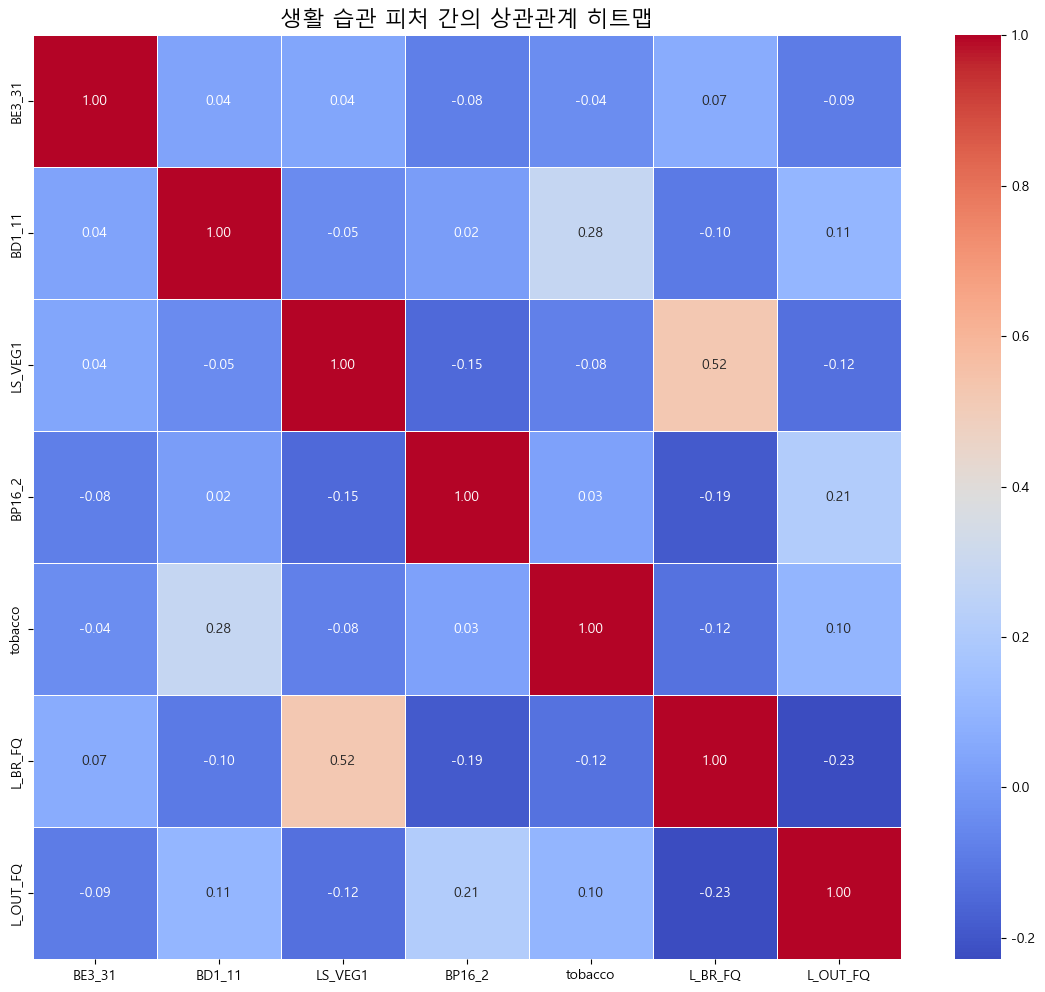

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df가 이미 로드되어 있다고 가정합니다.
# df = pd.read_csv('your_data.csv') # 예시

# 분석할 생활습관 피처 열 정의 (추가된 열 포함)
lifestyle_features_for_corr = ['BE3_31', 'BD1_11', 'LS_VEG1', 'BP16_2', 'tobacco', 'L_BR_FQ', 'L_OUT_FQ'] #여기서 수면 시간은 결측치 많으므로 제외

# 선택된 열들만 포함하는 DataFrame 생성 및 결측치 제거
# 상관관계 계산 시 NaN 값은 자동으로 제외되지만, 명시적으로 제거하는 것이 좋습니다.
selected_df_for_corr = df[lifestyle_features_for_corr].dropna()

# 피처들 간의 상관관계 매트릭스 계산
correlation_matrix = selected_df_for_corr.corr()

# 히트맵 그리기
plt.figure(figsize=(14, 12)) # 그래프의 크기 설정 (피처가 많으므로 크게 설정)
sns.heatmap(
    correlation_matrix,
    annot=True,      # 각 셀에 상관계수 값 표시
    cmap='coolwarm', # 색상 팔레트 (양의 상관관계는 따뜻한 색, 음의 상관관계는 차가운 색)
    fmt=".2f",       # 소수점 둘째 자리까지 표시
    linewidths=.5    # 셀 간의 경계선 두께
)
plt.title('생활 습관 피처 간의 상관관계 히트맵', fontsize=16) # 그래프 제목 설정
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 피처 및 타겟 정의
X = df[['BE3_31', 'BD1_11', 'tobacco', 'L_BR_FQ']]

# y의 NaN을 최빈값으로 대체
y = df['HE_HP2']
y = y.fillna(y.mode()[0])  # mode()는 최빈값을 반환하며, 여러 개일 수 있으므로 [0]으로 첫 번째를 선택

# X에 결측치가 있을 경우 제거하거나 채워야 함
# 예시: 최빈값으로 결측치 채우기
for col in X.columns:
    X[col] = X[col].fillna(X[col].mode()[0])

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# 피처 중요도 출력
importances = model.feature_importances_
important_features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(important_features)


tobacco    0.383886
BE3_31     0.277795
BD1_11     0.188051
L_BR_FQ    0.150268
dtype: float64


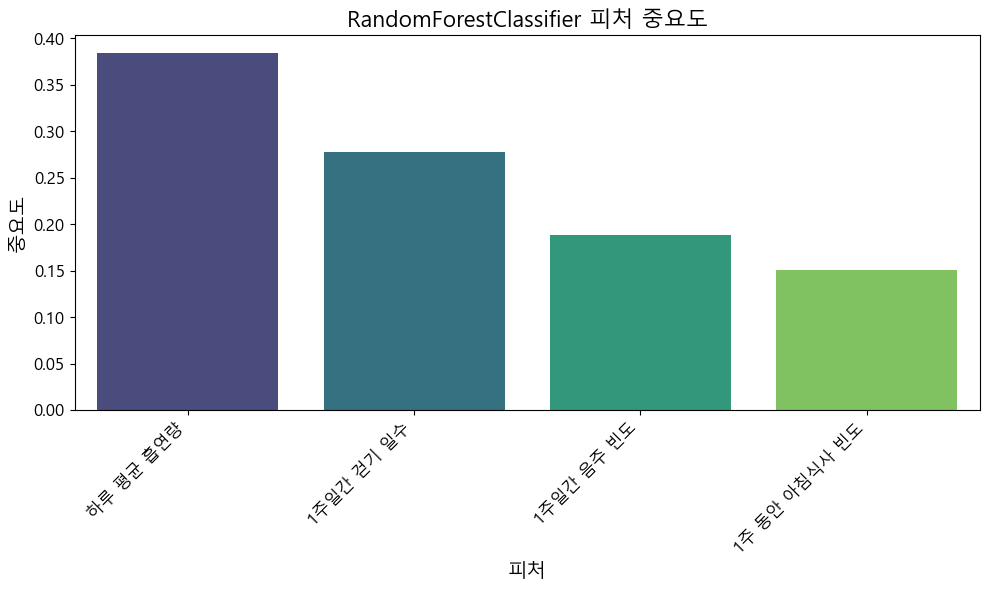

In [24]:
# 피처 한글 이름 매핑 딕셔너리 (이전 대화에서 사용된 것 재사용)
feature_korean_names = {
    'BE3_31': '1주일간 걷기 일수',
    'BD1_11': '1주일간 음주 빈도',
    'tobacco': '하루 평균 흡연량',
    'L_BR_FQ': '1주 동안 아침식사 빈도',
    # 여기에 더 많은 피처가 있다면 추가해주세요.
    # 'HE_sbp1': '수축기 혈압 (최고 혈압)',
    # ... 등
}

# 피처 중요도의 인덱스(피처 이름)를 한글 이름으로 변경
# .rename() 메서드를 사용하고, key가 없는 경우 원래 이름을 유지하도록 errors='ignore' 설정
important_features_korean = important_features.rename(index=feature_korean_names, errors='ignore')


plt.figure(figsize=(10, 6)) # 그래프 크기 설정
sns.barplot(x=important_features_korean.index, y=important_features_korean.values, palette='viridis')
plt.title('RandomForestClassifier 피처 중요도', fontsize=16) # 그래프 제목
plt.xlabel('피처', fontsize=14) # X축 레이블
plt.ylabel('중요도', fontsize=14) # Y축 레이블
plt.xticks(rotation=45, ha='right', fontsize=12) # X축 라벨 회전 및 정렬
plt.yticks(fontsize=12) # Y축 폰트 크기
plt.tight_layout() # 레이아웃 자동 조정
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 피처 및 타겟 정의
X = df[['BE3_31', 'BD1_11', 'tobacco', 'L_BR_FQ']]

# y의 NaN을 최빈값으로 대체
y = df['HE_DM_HbA1c2']
y = y.fillna(y.mode()[0])  # mode()는 최빈값을 반환하며, 여러 개일 수 있으므로 [0]으로 첫 번째를 선택

# X에 결측치가 있을 경우 제거하거나 채워야 함
# 예시: 최빈값으로 결측치 채우기
for col in X.columns:
    X[col] = X[col].fillna(X[col].mode()[0])

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# 피처 중요도 출력
importances = model.feature_importances_
important_features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(important_features)


tobacco    0.362728
BE3_31     0.275424
BD1_11     0.199061
L_BR_FQ    0.162787
dtype: float64


In [23]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 피처 및 타겟 정의
X = df[[ 'L_BR_FQ','LS_VEG1','L_OUT_FQ']]

# y의 NaN을 최빈값으로 대체
y = df['HE_DM_HbA1c2']
y = y.fillna(y.mode()[0])  # mode()는 최빈값을 반환하며, 여러 개일 수 있으므로 [0]으로 첫 번째를 선택

# X에 결측치가 있을 경우 제거하거나 채워야 함
# 예시: 최빈값으로 결측치 채우기
for col in X.columns:
    X[col] = X[col].fillna(X[col].mode()[0])

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# 피처 중요도 출력
importances = model.feature_importances_
important_features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(important_features)


L_OUT_FQ    0.405043
L_BR_FQ     0.356103
LS_VEG1     0.238854
dtype: float64


In [26]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 피처 및 타겟 정의
X = df[['BE3_31', 'BD1_11', 'tobacco', 'L_BR_FQ']]

# y의 NaN을 최빈값으로 대체
y = df['HE_obe2']
y = y.fillna(y.mode()[0])  # mode()는 최빈값을 반환하며, 여러 개일 수 있으므로 [0]으로 첫 번째를 선택

# X에 결측치가 있을 경우 제거하거나 채워야 함
# 예시: 최빈값으로 결측치 채우기
for col in X.columns:
    X[col] = X[col].fillna(X[col].mode()[0])

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# 피처 중요도 출력
importances = model.feature_importances_
important_features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(important_features)


tobacco    0.398547
BE3_31     0.265374
BD1_11     0.198054
L_BR_FQ    0.138025
dtype: float64


In [24]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 피처 및 타겟 정의
X = df[['L_BR_FQ','LS_VEG1','L_OUT_FQ']]

# y의 NaN을 최빈값으로 대체
y = df['HE_obe2']
y = y.fillna(y.mode()[0])  # mode()는 최빈값을 반환하며, 여러 개일 수 있으므로 [0]으로 첫 번째를 선택

# X에 결측치가 있을 경우 제거하거나 채워야 함
# 예시: 최빈값으로 결측치 채우기
for col in X.columns:
    X[col] = X[col].fillna(X[col].mode()[0])

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# 피처 중요도 출력
importances = model.feature_importances_
important_features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(important_features)


L_OUT_FQ    0.581581
LS_VEG1     0.247897
L_BR_FQ     0.170522
dtype: float64


ANOVA F-test 결과 (p-value 기준 정렬):
                                     Feature    F-value       p-value  \
1                                    LS_VEG1  91.335786  2.001348e-58   
2                                     BD1_11  80.419583  1.710143e-51   
4                                    L_BR_FQ  74.910783  5.455939e-48   
11                                    BP16_2  72.831310  1.149416e-46   
7                                   L_OUT_FQ  67.097289  5.163115e-43   
9                                    tobacco  12.098044  6.663600e-08   
3                                     BE3_31   9.271036  4.036725e-06   
6                                    L_DN_FQ   4.602311  3.191306e-03   
8                                   LS_FRUIT   3.856337  9.037017e-03   
0                                      BE5_1   1.583863  1.909787e-01   
10                                    BP16_1   1.412540  2.369800e-01   
13     Weekly_Total_m_Intensity_Activity_Min   1.140154  3.312726e-01   
14                

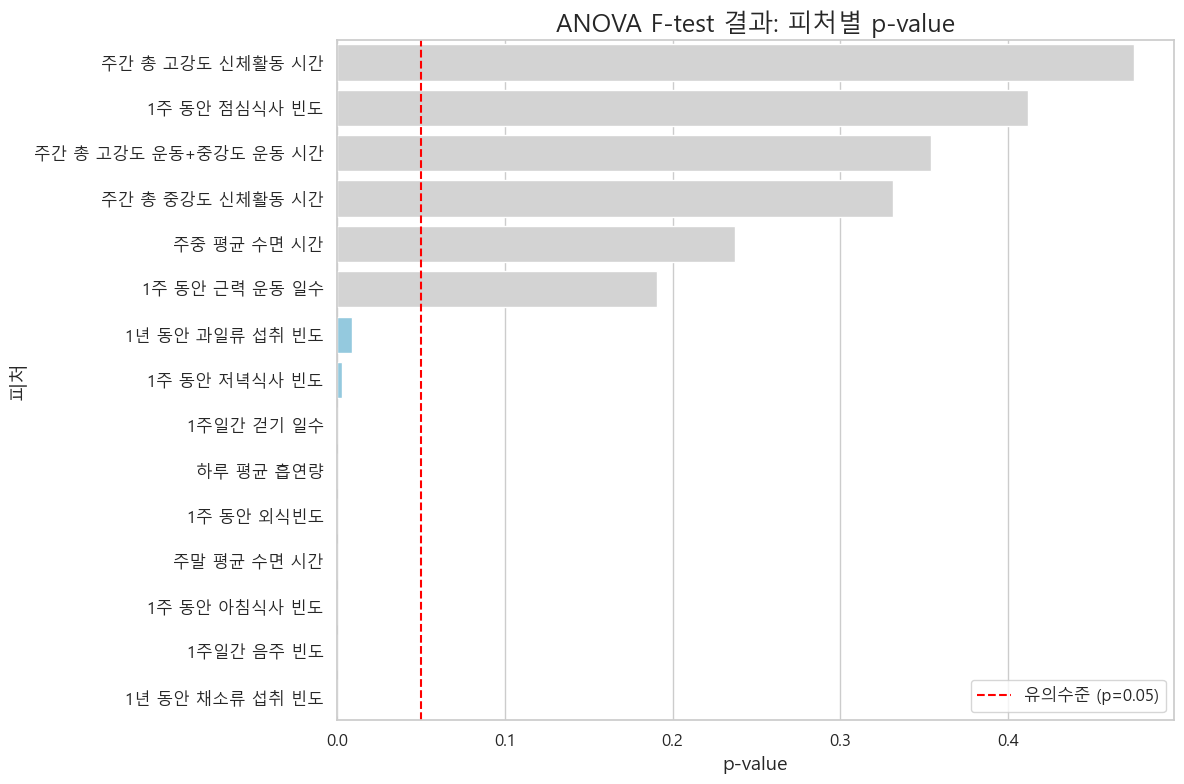

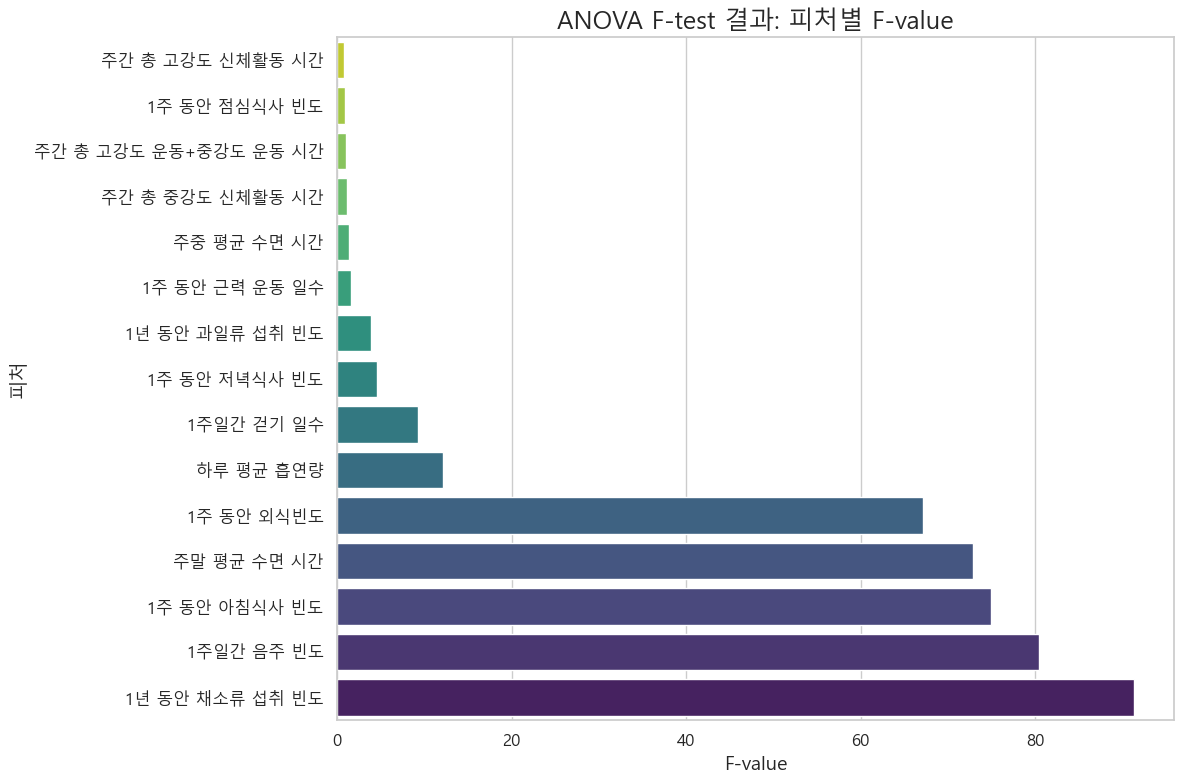

In [33]:
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # np.nan 사용을 위해 임포트

# 시각화 설정
sns.set(style="whitegrid")

# 한글 폰트 설정 (이전 대화에서 사용한 설정 유지)
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows 사용자
# plt.rcParams['font.family'] = 'AppleGothic' # macOS 사용자 (주석 해제 후 사용)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지


# --- 1. Define Features (X) and Target (y) ---
X = df[['BE5_1', 'LS_VEG1', 'BD1_11', "BE3_31", 'L_BR_FQ', 'L_LN_FQ',
        'L_DN_FQ', 'L_OUT_FQ', 'LS_FRUIT', 'tobacco', 'BP16_1', 'BP16_2',
        'Weekly_Total_High_Intensity_Activity_Min', 'Weekly_Total_m_Intensity_Activity_Min', 'plus']].copy() # copy() 추가
y = df['HE_HP2'].copy() # copy() 추가


# --- 2. Handle Missing Values (Imputation) ---

# Impute missing values in X (features) using the mode
imputer_X = SimpleImputer(strategy='most_frequent')
X_imputed = imputer_X.fit_transform(X)
# Convert the imputed NumPy array back to a DataFrame to retain column names
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Impute missing values in y (target) using the mode
imputer_y = SimpleImputer(strategy='most_frequent')
# Reshape y for the imputer (it expects 2D array), then flatten back to 1D
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# --- 3. Scale Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed_df)

# --- 4. Perform ANOVA F-test ---
# Use the scaled features (X_scaled) and the imputed target (y_imputed)
f_values, p_values = f_classif(X_scaled, y_imputed)

# --- 5. Organize Results into a DataFrame ---
result_df = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_values,
    'p-value': p_values
})

# --- 6. Filter Significant Features ---
result_df['Significant (p<0.05)'] = result_df['p-value'] < 0.05

# --- 7. Sort Results by p-value ---
result_df_sorted = result_df.sort_values(by='p-value')

print("ANOVA F-test 결과 (p-value 기준 정렬):")
print(result_df_sorted)

# --- 8. Get List of Significant Features ---
significant_features1 = result_df_sorted[result_df_sorted['Significant (p<0.05)'] == True]['Feature'].tolist()

print("\n유의미한 생활습관 피처 리스트 (p < 0.05):")
print(significant_features1)


# --- 시각화 코드 추가 ---

# 피처 한글 이름 매핑 딕셔너리
# 모든 사용된 피처에 대한 매핑을 추가해야 합니다.
feature_korean_names = {
    'BE5_1': '1주 동안 근력 운동 일수',
    'LS_VEG1': '1년 동안 채소류 섭취 빈도',
    'BD1_11': '1주일간 음주 빈도',
    'BE3_31': '1주일간 걷기 일수',
    'L_BR_FQ': '1주 동안 아침식사 빈도',
    'L_LN_FQ': '1주 동안 점심식사 빈도',
    'L_DN_FQ': '1주 동안 저녁식사 빈도',
    'L_OUT_FQ': '1주 동안 외식빈도',
    'LS_FRUIT': '1년 동안 과일류 섭취 빈도',
    'tobacco': '하루 평균 흡연량',
    'BP16_1': '주중 평균 수면 시간',
    'BP16_2': '주말 평균 수면 시간',
    'Weekly_Total_High_Intensity_Activity_Min': '주간 총 고강도 신체활동 시간',
    'Weekly_Total_m_Intensity_Activity_Min': '주간 총 중강도 신체활동 시간',
    'plus': '주간 총 고강도 운동+중강도 운동 시간'
    # 여기에 다른 피처들이 있다면 추가해주세요.
}

# p-value를 기준으로 정렬된 DataFrame 사용
plot_df = result_df_sorted.copy()
# 피처 이름을 한글로 변경
plot_df['Feature_Korean'] = plot_df['Feature'].map(feature_korean_names).fillna(plot_df['Feature'])

plt.figure(figsize=(12, 8)) # 그래프 크기 설정

# p-value 막대 그래프
# 유의미한 피처를 강조하기 위해 색상 팔레트 설정
colors = ['skyblue' if sig else 'lightgray' for sig in plot_df['Significant (p<0.05)']]

sns.barplot(x='p-value', y='Feature_Korean', data=plot_df, palette=colors)

# 유의미성 기준선 (p=0.05) 표시
plt.axvline(x=0.05, color='red', linestyle='--', linewidth=1.5, label='유의수준 (p=0.05)')

plt.title('ANOVA F-test 결과: 피처별 p-value', fontsize=18)
plt.xlabel('p-value', fontsize=14)
plt.ylabel('피처', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.gca().invert_yaxis() # p-value가 작은(유의미한) 피처가 위로 오도록 y축 순서 뒤집기
plt.tight_layout()
plt.show()

# F-value 막대 그래프 (선택 사항: p-value와 함께 보여주면 더 좋음)
plt.figure(figsize=(12, 8))
# F-value는 p-value 순서와 동일하게 정렬된 상태에서 그립니다.
sns.barplot(x='F-value', y='Feature_Korean', data=plot_df, palette='viridis')

plt.title('ANOVA F-test 결과: 피처별 F-value', fontsize=18)
plt.xlabel('F-value', fontsize=14)
plt.ylabel('피처', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis() # F-value가 큰 피처가 위로 오도록 y축 순서 뒤집기
plt.tight_layout()
plt.show()